In [1]:
import sys
sys.path.append("../")

In [2]:
import random
from mollie.io import read_rgb
from mollie.core import Mollie
from mollie.trainer import Trainer
from matplotlib import pyplot as plt
from mollie.dataset import ImageFolderDataset

data_dir + class_map

In [3]:
data_dir = "/Users/riccardomusmeci/Developer/data/noisy_imagenette2-320/train"

In [4]:
class_map = {
    0: "n03394916-trumpet",
    1: "n03417042-truck",
    2: "n03445777-ball",
    3: "n02102040-dog",
    4: "n03425413-distributor", 
    5: "n03888257-parachute",
    6: "n03028079-church",
    7: "n03000684-chainsaw",
    8: "n01440764-fish",
    9: "n02979186-player"
  }

Class instances (trainer, dataset, mollie)

In [5]:
trainer = Trainer(
    data_dir=data_dir,
    model_name="resnet18",
    class_map=class_map,
    input_size=224,
    batch_size=128,
    val_dir=None,
    epochs=5, # increase up to 10 for better results
    num_workers=5
)

In [6]:
dataset = ImageFolderDataset(
    data_dir=data_dir,
    class_map=class_map
)
dataset.stats()

 ----------- Dataset Stats -----------
> ['n03394916-trumpet'] : 954/9469 -> 10.075%
> ['n03417042-truck'] : 971/9469 -> 10.255%
> ['n03445777-ball'] : 958/9469 -> 10.117%
> ['n02102040-dog'] : 961/9469 -> 10.149%
> ['n03425413-distributor'] : 933/9469 -> 9.853%
> ['n03888257-parachute'] : 960/9469 -> 10.138%
> ['n03028079-church'] : 937/9469 -> 9.895%
> ['n03000684-chainsaw'] : 848/9469 -> 8.956%
> ['n01440764-fish'] : 956/9469 -> 10.096%
> ['n02979186-player'] : 991/9469 -> 10.466%
 -------------------------------------


In [7]:
mollie = Mollie(
    trainer=trainer,
    dataset=dataset,
    cv_n_folds=2, # increase up to 5 for better results
    filter_by="prune_by_class"
)

Finding noisy labels

In [8]:
noisy_labels = mollie.start()


 ================ Start Cross Val Iteration  ================ 

> Trainer setup
> Setting up model resnet18
> Setting up optimizer (Adam), lr_scheduler (CosineAnnealingLR), and loss (LabelSmoothingCrossEntropy)
> Trainer setup done
> Trainer fit on mps.. 
> Sampling train dataset from cross-val train indices and setting data loader.
 ----------- Dataset Stats -----------
> ['n03394916-trumpet'] : 477/4734 -> 10.076%
> ['n03417042-truck'] : 485/4734 -> 10.245%
> ['n03445777-ball'] : 479/4734 -> 10.118%
> ['n02102040-dog'] : 481/4734 -> 10.161%
> ['n03425413-distributor'] : 466/4734 -> 9.844%
> ['n03888257-parachute'] : 480/4734 -> 10.139%
> ['n03028079-church'] : 469/4734 -> 9.907%
> ['n03000684-chainsaw'] : 424/4734 -> 8.956%
> ['n01440764-fish'] : 478/4734 -> 10.097%
> ['n02979186-player'] : 495/4734 -> 10.456%
 -------------------------------------
> Starting training for 5 epochs..
Epoch 1 - [1/37] : train/loss 2.4379353523254395
Epoch 1 - [10/37] : train/loss 2.706179618835449
Epo

Plotting random noisy label

Suggested label: n03417042-truck with score 0.2785


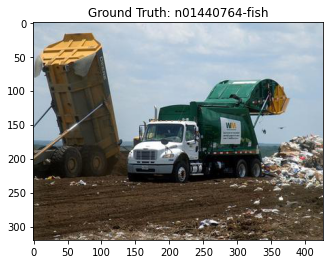

In [57]:
noisy_label = random.choice(noisy_labels)
image = read_rgb(noisy_label['file_name'])
plt.imshow(image)
plt.title(f"Ground Truth: {noisy_label['ground_truth']}")
print(f"Suggested label: {noisy_label['predicted']} with score {noisy_label['prediction_score']:.4f}")

In [17]:
noisy_label

{'file_name': '/Users/riccardomusmeci/Developer/data/noisy_imagenette2-320/train/n02979186-player/ILSVRC2012_val_00034563.JPEG',
 'ground_truth': 'n02979186-player',
 'predicted': 'n03394916-trumpet',
 'prediction_score': 0.12779128551483154}